# Основы работы с PyTorch


Фреймворк [`PyTorch`](https://pytorch.org/) — это библиотека машинного обучения с открытым исходным кодом для языка программирования `Python`. Как правило, фреймворк `PyTorch` используется для приложений [глубокого обучения нейронных сетей](https://www.deeplearningbook.org/). 
Первоначально `PyTorch` был разработан исследовательской группой по искусственному интеллекту в виде фреймворка `torch` для языка программирования `Luno`.

Сегодня `PyTorch` представляет собой основной и один из наиболее популярных фреймворков для работы с нейронными сетями. Вокруг фреймворка собрано активное сообщество, которое не только поддерживает сам фреймворк, но и развивает свои проекты на его основе. Наиболее успешные из таких проектов попадают в т. н. [экосистему `PyTorch`](https://pytorch.org/ecosystem/). Также на `PyTorch` написаны такие известные инструменты, как инструменты сообщества [Hugging Face](https://huggingface.co/) и многие другие.

Особенностями `PyTorch` являются удобство работы с большими упорядоченными массивами данных, в том числе на разных вычислителях; возможности автоматизации обучения нейронных сетей такими методами, как обратное распространение ошибки, и удобство работы с отдельными слоями и составляющими архитектур нейронных сетей. Данная практика посвящена изучению указанных особенностей `PyTorch`.

<blockquote>
    
Также можно рекомендовать следующие ресурсы для дополнительного изучения `PyTorch`:
<!-- * https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html — официальный курс `PyTorch` за 60 минут. -->
* https://pytorch.org/tutorials/index.html — коллекция официальных уроков по `PyTorch`, например https://pytorch.org/tutorials/beginner/basics/intro.html — базовые уроки.
* https://pytorch.org/tutorials/recipes/recipes_index.html — набор более специализированных официальных уроков `PyTorch`.
* https://d2l.ai/ — Dive into Deep Learning. Интерактивная книга с примерами на `PyTorch` и других фреймворках.
* https://www.learnpytorch.io/ — Learn PyTorch for Deep Learning: Zero to Mastery book.
* https://uvadlc-notebooks.readthedocs.io/en/latest/index.html — UvA Deep Learning Tutorials.
* https://www.deeplearningwizard.com/deep_learning/intro/ — Deep Learning Wizard, интерактивная книга.
* https://github.com/ritchieng/the-incredible-pytorch — коллекция ресурсов, посвященных `PyTorch`.

> Кракто, в виде справки перечислим [основные особенности](https://github.com/Devinterview-io/pytorch-interview-questions) фреймворка `PyTorch`.
> * __Динамические вычисления__. В отличие от популярного [`TensorFlow`](https://www.tensorflow.org/?hl=ru) ( и фреймворков на его основе, например [`keras`](https://keras.io/), который в основном использует <tt>статические вычислительные графы</tt>, [`PyTorch`](https://pytorch.org/) предлагает <tt>динамические вычислительные возможности</tt>. Это позволяет ему работать с более сложными архитектурами и облегчает итеративный, удобный для отладки рабочий процесс. Более того, динамическая природа `PyTorch` естественным образом сочетается с питоновскими конструкциями, что приводит к более интуитивному опыту разработки.
> * __Простота использования.__ `PyTorch` известен своим упрощенным, питоновским интерфейсом. Это делает процесс построения и обучения моделей более доступным, особенно для разработчиков с опытом работы на `Python`.
> * __Ускорение на <tt>`GPU`</tt>__. `PyTorch` отлично использует вычислительные возможности графических процессоров, значительно сокращая время обучения. Он также обеспечивает беспрепятственное использование нескольких <tt>`GPU`</tt>.
> * __Гибкость модели__. Еще одной отличительной особенностью является возможность интеграции управляющих структур `Python`, таких как циклы и условия, что дает разработчикам большую гибкость в определении поведения модели.
> * __Отладка и визуализация__. `PyTorch` интегрируется с такими библиотеками, как matplotlib, и предлагает набор отладочных инструментов, а именно `torch.utils.bottleneck`, `torch.utils.tester` и `torch.utils.gdb`.

Таким образом, следует выбирать PyTorch для:
* проектов, ориентированных на исследования. Особенно для проектов, в которых требуется динамическое поведение или эксперименты с архитектурами нейронных сетей.
* прототипирования. Для быстрого и оперативного цикла разработки.
* проектов малого и среднего масштаба. Там, где важны простота использования и быстрое обучение.

## Импорт

Давайте для начала попробуем импортировать библиотеку PyTorch.

In [1]:
import torch
print('version:',torch.version.__version__)

version: 2.1.2+cpu


Теперь попробуем импортировать остальные библиотеки, которые понадобятся нам в этом уроке.

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

Теперь выберем устройство. Чаще всего возможны варианты использования `PyTorch` с центральным процессором (`CPU`) или с графическим ускорителем (`GPU`) компании `NVidia` (поддержка фреймворка `cuda`). Однако, также последние версии `PyTorch` позволяют работать с расширенным набором устройств, среди которых следующие варианты: `cpu, cuda, xpu, mkldnn, opengl, opencl, ideep, hip, ve, ort, mlc, xla, lazy, vulkan, meta, hpu`.

Итак, выберем устройство (`CPU` или `GPU`) и выведем необходимую информацию.

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print('Cuda is available:',torch.cuda.is_available())
    
    n_devices = torch.cuda.device_count()
    print('number of devices: %d'%(n_devices))
    
    for cnt_device in range(n_devices):
        print(torch.cuda.get_device_name(cnt_device))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(cnt_device)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(cnt_device)/1024**3,1), 'GB')


num_workers=os.cpu_count()
print ('available number of workers:',num_workers)
       
dtype = torch.float
torch.set_default_dtype(dtype) # float32
print('Current data type:',dtype)

Using device: cpu
available number of workers: 4
Current data type: torch.float32


Тут используются следующие проверки:


In [4]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


Отметим также, что по каждому устройству `GPU` может быть получена информация при помощи функций `torch.cuda.get_device_properties(device)` и `torch.cuda.mem_get_info(device=None)`; или в командной строке при помощи утилиты `nvidia-smi`. Более подробную информацию о доступной информации о `GPU` можно получить в соответствующем разделе документации [тут](https://pytorch.org/docs/stable/notes/cuda.html).

В целях воспроизводимости экспериментов мы установим все случайные величины в одно положение. Однако отметим, что следующий код гарантирует воспроизводимость результатов только для одной конфигурации вычислительного устройства, включая как его аппаратную, так и его программную часть. Также отмечается, что в некоторых случаях использование директив `deterministic` и `use_deterministic_algorithms` из кода ниже может замедлять или даже приводить к ошибкам в работе `PyTorch`. Поэтому такие директивы лучше использовать только в контролируемых экспериментах. Подробней о данной теме можно узнать [тут](https://pytorch.org/docs/stable/notes/randomness.html).

In [5]:
seed = 42
torch.manual_seed(seed) #cpu
torch.cuda.manual_seed(seed) #gpu
np.random.seed(seed) #numpy
random.seed(seed) # random and transforms

torch.backends.cudnn.deterministic=True #cudnn
# torch.use_deterministic_algorithms(True)

## Понятие тензор в `torch`

Основной тип данных в `PyTorch` — это <tt>тензор</tt> (https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html). Тензоры могут быть разной размерности и разного типа данных.  

В нашем случае мы установили основной тип значений `float32`.

Однако `PyTorch` поддерживает и другие типы, про которые можно узнать [тут](https://pytorch.org/docs/stable/tensors.html).

Важно понимать, что `PyTorch` является строго типизированным фреймворком, это значит, что типы данных должны быть заданы и для каждой операции должны совпадать или быть преобразованными.

Также отметим, что тензор в данном понимании отличается от стандартного, принятого в физике, и обозначает просто многомерную матрицу.

>В глубоком обучении [тензоры](https://www.dataquest.io/blog/pytorch-for-beginners/) - это фундаментальная структура данных, очень похожая на массивы и матрицы, с помощью которой мы можем эффективно выполнять математические операции над большими наборами данных. Тензор может быть представлен как матрица, а также как вектор, скаляр или массив более высокой размерности.

>Чтобы было проще представить, можно думать о тензоре как о простом массиве, содержащем скаляры или другие массивы. В `PyTorch` тензор - это структура, очень похожая на `ndarray`, с той лишь разницей, что они могут работать на `GPU`, что значительно ускоряет процесс вычислений.



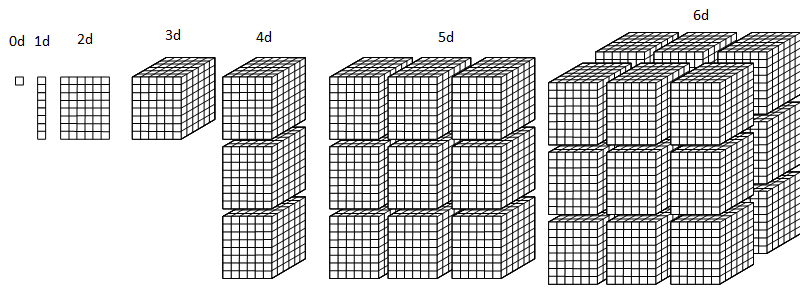

>Отметим [основные особенности](https://github.com/Devinterview-io/pytorch-interview-questions) использования понятия тензор.
В `PyTorch` тензоры служат фундаментальным строительным блоком, обеспечивающим эффективные численные вычисления на различных устройствах, таких как `CPU, GPU и TPU`. Концептуально тензоры похожи на numpy.arrays, но при этом имеют преимущества аппаратного ускорения и предлагают ряд дополнительных возможностей для глубокого обучения и научных вычислений.
> Основные возможности:
> * __Автоматическое дифференцирование__. Тензоры отслеживают операции, выполняемые над ними, что позволяет мгновенно дифференцировать их для таких задач, как градиентный спуск в нейронных сетях. Установив флаг `requires_grad`, вы можете указать, какие тензоры должны отслеживать свои градиенты.
> * __Вычислительные графы__. Операции над тензорами строят вычислительные графы, позволяя проследить поток данных и связанных с ними градиентов.
> * __Агностичность по отношению к устройствам.__ Тензоры можно гибко перемещать между доступными аппаратными ресурсами для оптимальных вычислений.
> * __Гибкое управление памятью. `PyTorch` динамически управляет памятью, а его тензоры знают о вычислительном графе, что делает сборку мусора более эффективной.
> * __Уникальные тензоры__ `Float16`, `Float32`, `Float64`. Тензоры поддерживают различные численные точности, по умолчанию используются $32$-битные плавающие числа.
> * __Разреженные тензоры__ - эти тензоры похожи на плотные, но оптимизированы для задач с большим количеством нулей, что позволяет экономить память и вычисления.
> * __Квантованные тензоры__ - это тензоры, разработанные специально для задач, требующих пониженной точности, чтобы получить преимущества от более быстрых операций и меньшей занимаемой памяти.
> * __Операции над элементами__ - `PyTorch` рассчитан на параллелизм и предоставляет богатый набор поэлементных операций, которые можно применять различными способами.




Рассмотрим примеры некоторых из приведенных выше тензоров:

In [6]:
x = torch.tensor(3.)
print(f'скалярная величина: {x}, {x.ndim}-d размерность\n')

x = torch.tensor([3.,2])
print(f'векторная величина: {x}, {x.ndim}-d размерность\n')

x = torch.tensor([[1.,2],[3.,4]])
print(f'матрица величина: \n{x},\n {x.ndim}-d размерность\n')

x = torch.tensor([[[1.,2],[3.,4]],[[5.,6],[7.,8]]])
print(f'набор матриц: \n{x},\n {x.ndim}-d размерность\n')
print(f' и т.д.')

скалярная величина: 3.0, 0-d размерность

векторная величина: tensor([3., 2.]), 1-d размерность

матрица величина: 
tensor([[1., 2.],
        [3., 4.]]),
 2-d размерность

набор матриц: 
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]]),
 3-d размерность

 и т.д.


Тензоры могут быть заданы напрямую при помощи функции `torch.tensor` или преобразованы, например, из `numpy` при помощи функции `from_numpy`.

In [7]:
x = torch.randn(2, 1)

x_np = np.random.randn(2,1)
x_torch = torch.from_numpy(x_np)
print(x_torch)

tensor([[ 0.4967],
        [-0.1383]], dtype=torch.float64)


Однако, также может быть выполнено и прямое преобразование типов данных.

In [8]:
numpy_array = np.array([1, 2, 3, 4])
tensor = torch.Tensor(numpy_array)

Кроме того, тензор может быть размещен в различном пространстве памяти. Он может храниться на `CPU` (по умолчанию) или на `GPU` либо другом устройстве. Для этого тензор можно отправлять на нужное устройство при помощи метода `to()` или напрямую `cpu()`, `cuda()`. Тут мы будем указывать ранее полученное значение переменной `device`.
<!-- . -->

In [9]:
print(device)
x = torch.randn(2, 1).to(device)

cpu


Тензор может быть отправлен на необходимое устройство сразу при создании.

In [10]:
x = torch.tensor([1,2],device = device)
x = torch.tensor([1,2]).cpu()
if torch.cuda.is_available():
    x = torch.tensor([1,2]).cuda()

Также отметим, что в случае наличия нескольких `GPU` тензоры могут быть направлены на них автоматически.
Ниже приведен пример работы с несколькими GPU.

In [11]:
if torch.cuda.is_available():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    x.to(device)  # Moves model to GPU device

if torch.cuda.device_count() > 1:  # Checks for multiple GPUs
    x = nn.DataParallel(x)  # Wraps model for multi-GPU training

> Кроме того, тензор может быть вычислен на заданном GPU с использованием контекстного менеджера.

In [12]:
if torch.cuda.is_available():
    with torch.cuda.device(0):  
        x_on_specific_gpu = torch.rand(2, 2)
        print(x_on_specific_gpu)

> **В числе лучших практик.** Важно понимать, что, хотя `GPU` обеспечивают огромную мощность параллельной обработки, они также имеют высокую задержку (<tt>латентность, latency</tt>) и ограниченную память (<tt>GRAM, GDDR</tt>) по сравнению с `CPU`.
Поэтому очень важно передавать данные (тензоры и модели) на `GPU` только в случае необходимости, чтобы минимизировать эти накладные расходы.

__Важно__. Тензор можно преобразовать обратно, например, в массив numpy, только если он находится в CPU и не используется в текущих вычислениях. Поэтому для вывода тензора в numpy мы будем создавать его копию при помощи detach() и будем использовать прямую директиву cpu.

In [13]:
x = torch.randn(2, 1)
print(x)
x_np = x.detach().cpu().numpy()
print(x_np)

tensor([[-1.1229],
        [-0.1863]])
[[-1.1228564 ]
 [-0.18632829]]


Наличие тензора на `GPU` можно порверить директивой `is_cuda`

In [14]:
x = x.to(device)
print(x.is_cuda)
print(x.cpu().is_cuda)

False
False


Также устройство и другие атрибуты тензора могут быть проверены следующими функциями

In [15]:
x = torch.tensor([1,2]).to(device)
print(f'shape: {x.shape}, device: {x.device}, dtype: {x.dtype}, n dims: {x.ndim}')

shape: torch.Size([2]), device: cpu, dtype: torch.int64, n dims: 1


Обратите внимание, что в торч методы `shape` и `size()` - это почти синонимы. Однако `shape` - это атрибут

In [16]:
x.shape, x.size()

(torch.Size([2]), torch.Size([2]))

C [тензорами](https://pytorch.org/docs/stable/tensors.html#) можно проводить большенство тех-же операций, что и с массивами в `NumPy`

In [17]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

n = torch.tensor([[0,1,2],[3,4,5]]).type(dtype) # тип по умолчанию
l = torch.FloatTensor([[5,6,7],[8,9,10]]) # тензор заданного типа
m = torch.from_numpy(np.ones([2,3], dtype=np.float32)) * 0.1 

#-------------------
z = x + y*m + torch.exp(x)+torch.sqrt(n) + torch.pow(l,1.1)
print(z)

a = y[:,:1] + 1
print(a)

s = torch.transpose(z,0,1) #transposition with axis pointing

print(s.detach().cpu().numpy())

z = s@s.T #matrix multiplication
print(z)


tensor([[17.3806,  8.2677, 12.1663],
        [13.3551, 15.6538, 18.0811]])
tensor([[3.],
        [3.]])
[[17.38063  13.355056]
 [ 8.26774  15.653769]
 [12.16627  18.081142]]
tensor([[480.4438, 352.7555, 452.9321],
        [352.7555, 313.3960, 383.6256],
        [452.9321, 383.6256, 474.9458]])


В том числе не сложен и переход из `ndarray` в `tensor`

In [18]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


и переход обратно


In [19]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


<!-- >Важно заметить, что для преобразования тензоров в `numpy` требуется, чтобы тензор находился в распоряжении `CPU`, а не в памяти `GPU`. В случае если тензор находится на `GPU`, необходимо предварительно вызвать `.cpu()` на тензоре. Таким образом, вы получите строку типа `np_arr = tensor.cpu().numpy()` -->

Также важно знать, что некоторые операции в `pytorch` называются не как в `numpy`.

В первую очередь тут стоит изучить варианты операций с умножением матриц. Это одна из наиболее часто-встречаемых операций в обучении нейронных сетей. По сути к состовной части этой операции сводится большенство операций на уровне вычислителя (например `flops=fma= floatpoint opeartion = float point multiplication and adding`.

В нейронных сетях довольно часто мы имеем входной вектор $\mathbf{x}$ который преобразуется с помощью обучаемой матрицы весов 
$\mathbf{W}$. То есть выполняется операция $\mathbf{x}\mathbf{W}$.
Существует множество способов и функций для выполнения умножения матриц, некоторые из них мы перечислим ниже:
* `torch.matmul` выполняет матричное произведение над двумя тензорами, где конкретное поведение зависит от размерности. Если оба входа - матрицы (двумерные тензоры), то выполняется стандартное матричное произведение. Для входов большей размерности функция поддерживает т.н. трансляцию (`broadcasting `). Это операция сокращения лишних размерностей. \
Также операция `matmul` может быть записана как `a @ b`, аналогично `numpy`.
* `torch.mm` : Выполняет матричное произведение над двумя матрицами, но не поддерживает `broadcasting`.
* `torch.bmm`: Выполняет матричное произведение с использованием батчей. Если первый тензор $b\times n\times m$ и второй тензор $b\times n \times p$, то результат будет иметь размерность $b\times m \times p$ и будет вычисляться для каждого тензора из набора $b$.
* `torch.einsum`: Выполняет умножение матриц и многое другое (т.е. суммы произведений), используя [соглашение о суммировании Эйнштейна](https://habr.com/ru/articles/544498/). То есть суммирование ведётся по всем индексам, повторяющимся дважды, например $b_i=\sum_j A_{ji}v_j$ записывается как $A_{ji}v^j$

__Среди этих операций в первую очередь важно понимать `mm` и `@`__

In [20]:
z = s.matmul(s.T) #matrix multiplication
print(z)

z = s.mm(s.T) #matrix multiplication
print(z)

z = torch.mm(y.T, m) #matrix multiplication
print(z)


tensor([[480.4438, 352.7555, 452.9321],
        [352.7555, 313.3960, 383.6256],
        [452.9321, 383.6256, 474.9458]])
tensor([[480.4438, 352.7555, 452.9321],
        [352.7555, 313.3960, 383.6256],
        [452.9321, 383.6256, 474.9458]])
tensor([[0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000],
        [0.4000, 0.4000, 0.4000]])


Также отдельно могут быть указаны операции:
* умножение матрицы на вектор `torch.mv`
* внутреннее умножение векторов `torch.dot`
* внешнее умножение векторов `torch.outer`

In [21]:
z = torch.mv(m.T,y[:,0]) #matrix to vector multiplication
print(z)

z = torch.dot(m[:,0],y[:,1]) #inner vector product
print(z)

z = torch.outer(m[:,0],y[:,1]) #inner vector product
print(z)

tensor([0.4000, 0.4000, 0.4000])
tensor(0.4000)
tensor([[0.2000, 0.2000],
        [0.2000, 0.2000]])


Второй тип специальных операций — это __представление__. Тут наиболее важной является операция `view`. Эта операция представляет один и тот же набор значений как тензоры разной размерности. Важно понимать, что функция не меняет расположение значений в памяти. При этом и переменная, содержащая тензор, остается на месте.
> [Другими словами](https://pytorch.org/docs/stable/tensor_view.html). Обычно операции `PyTorch` возвращает новый тензор в качестве выходных данных, например, `add()`. Но в случае операций `view` выходные данные представляют собой представления входных тензоров в новом виде. Это необходимо, чтобы избежать ненужного копирования данных. При операции `view` данные не перемещаются, `view` просто изменяет способ интерпретации одних и тех же данных.

<!-- > Отметим, также возможность более низкоуровневого управления памятью через `t.storage().data_ptr()` -->

In [22]:
t = torch.rand(4, 4)
print(t)
b = t.view(2, 8)
print(b)

tensor([[0.1053, 0.2695, 0.3588, 0.1994],
        [0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090],
        [0.5779, 0.9040, 0.5547, 0.3423]])
tensor([[0.1053, 0.2695, 0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423]])


Индексирование `view` может использоваться с параметром `-1`. Это необходимо, если возникает ситуация, когда вы не знаете, например, сколько строк вам нужно, но уверены в количестве столбцов. Тогда число строк вы можете указать как `-1`. При этом назвав необходимое число столбцов, например `1`. То есть `-1` означает, что число строк будет вычислено автоматически. Обратите внимание, такое отображение можно распространить на тензоры с количеством измерений и больше `2`. Только одно из значений оси может быть `-1`). 

Посмотрим в примере ниже, как выглядит вектор, полученный из нашего тензора.


In [23]:
print(z.view(1,- 1)) #reshape

tensor([[0.2000, 0.2000, 0.2000, 0.2000]])


Также функция `view` позволяет создавать новые «пустые» размерности данных. То есть размерности со значением $1$. Создадим новую размерность для нашего тензора в примере ниже.

In [24]:
print(z.shape)# Добавим размерность
print(z.view(1,*z.shape))# Добавим размерность
print(z.view(1,*z.shape).shape)# посмотрим что это значит
print(z.view(1,1,-1))# Добавим размерность

torch.Size([2, 2])
tensor([[[0.2000, 0.2000],
         [0.2000, 0.2000]]])
torch.Size([1, 2, 2])
tensor([[[0.2000, 0.2000, 0.2000, 0.2000]]])


Среди операций представления также важно отметить такие операции, как:
* `torch.ravel` — создание одномерного массива из массива любой размерности (аналог `torch.flatten`);
* `torch.permute` — перестановка размерностей (аналог `torch.transpose`);
* `torch.squeeze` — удаление пустых размерностей (со значением `1`);
* `torch.unsqueeze` — создание пустой размерности (со значением `1`);
* `torch.reshape` — пересборка тензора в тензор заданной размерности (в т. ч. с добавлением размерности);
* `torch.expand` — создание размерностей с копированием в них существующих данных.


In [25]:
x = torch.tensor([1, 2, 3])
print(x)
print(x.size())
print(x.expand(4, -1).shape)
print(x.expand(4, -1))

tensor([1, 2, 3])
torch.Size([3])
torch.Size([4, 3])
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])


In [26]:
x = torch.tensor([1, 2, 3]).expand(4, -1)
print(x.size())
print(x.flatten().size(), x.ravel().size())

torch.Size([4, 3])
torch.Size([12]) torch.Size([12])


Важно понимать, что в `torch` для экономии ресурсов новые тензора создаются только по необходимости. 
Например, если необходимо в ручном режиме создать "новый тензор", то для этого используется операция `clone()`.

In [27]:
a = x
b = x.clone()

Крайне важной является __операция объединения тензоров__ `cat`. Объединение может происходить по разным размерностям, указанным в атрибуте `dim`. Объединяемые тензоры должны иметь одинаковые размерности или быть одномерными тензорами с размером `0`. Размерность объединения может быть задана как `-1`, если число размерностей неизвестно.

In [28]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

z = torch.cat([x,y]) #dim = 0
print(z.shape,x.shape,y.shape)

z = torch.cat([x,y], dim=1)
print(z.shape)

z = torch.cat([x,y], dim=-1)
print(z.shape)

torch.Size([4, 3]) torch.Size([2, 3]) torch.Size([2, 3])
torch.Size([2, 6])
torch.Size([2, 6])


Также важно знать и другие способы объединения тензоров:
* `torch.stack` — объединение тензоров по новой размерности.
* `torch.split` — разъединение тензоров по существующей размерности.

In [29]:
x = torch.randn(2, 3)
print(x.shape)
x = torch.stack((x, x))
print(x.shape)
x = torch.split(x,1)
print(x[0].shape, x[1].shape )

torch.Size([2, 3])
torch.Size([2, 2, 3])
torch.Size([1, 2, 3]) torch.Size([1, 2, 3])


Также в `PyTorch` есть ряд специфических операций, адаптированных под цели его использования.

In [30]:
t = torch.tensor([1., 2.])
torch.save(t, 'tensor4test.pt')
print('saved t:',t)

del(t)

try:
    print(t)
except:
    print('tensor does not exist')
    
t_new = torch.load('tensor4test.pt')
print('new t:',t_new)



saved t: tensor([1., 2.])
tensor does not exist
new t: tensor([1., 2.])


*Отметим*, что в ряде случаев в `PyTorch` возможны два типа функций с именами вида   `foo(bar)` и `foo_(bar)`. Для таких случаев разница в том, что вариант вида  `foo(bar)`  является т.н. `immutable` функцией - то есть результ будет новым тензором в памяти. В противоположность ей функция вида `foo_(bar)` изменяет изначальный тензор, т.е. является `mutable` функцией. Последние ещё носят название `inplace` функций.

In [31]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2
print('inputs:\n',x,'\n',y,'\n');
z = torch.add(x,y)
print('result imutable\n',z)
x.add_(y)
print('\nresult mutable\n',x)

inputs:
 tensor([[ 0.1331,  0.8640, -1.0157],
        [-0.8887,  0.1498, -0.2089]]) 
 tensor([[2., 2., 2.],
        [2., 2., 2.]]) 

result imutable
 tensor([[2.1331, 2.8640, 0.9843],
        [1.1113, 2.1498, 1.7911]])

result mutable
 tensor([[2.1331, 2.8640, 0.9843],
        [1.1113, 2.1498, 1.7911]])


### Задание

**1.** Реализовать функцию, выполняющую операцию *полносвязного слоя* в `pytorch`:
1. для вектора.
2. для матрицы.
3. для тензора произвольной размерности.

### *При первом знакомстве с  `PyTorch` этот пример можно не изучать.*

>В `PyTorch` есть возможность для осуществления т.н. `bradcast` операций. Такие операции могут выполнены между тензорами, имеющими разную размерность, при условиях, что: начиная с конца размерности совпадают или промежуточные размерности имеют значение `1`.

In [32]:
x = torch.randn(  2,3)
y = torch.randn(2,2,3)
# print((x+y), end='\n\n')
print(f'Case 1: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(2,1,3)
y = torch.randn(2,  3)
# print((x+y), end='\n\n')
print(f'Case 2: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')


x = torch.randn(2,1,1,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 3: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(1,2,1,1,3)
y = torch.randn(2, 2, 3)
print(f'Case 4: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')

x = torch.randn(5,6,3,3)
y = torch.randn(    3,3)
print(f'Case 5: input x:{x.shape}, y:{y.shape}, output {(x+y).shape}', end='\n\n')


Case 1: input x:torch.Size([2, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 2, 3])

Case 2: input x:torch.Size([2, 1, 3]), y:torch.Size([2, 3]), output torch.Size([2, 2, 3])

Case 3: input x:torch.Size([2, 1, 1, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([2, 1, 1, 2, 2, 3])

Case 4: input x:torch.Size([1, 2, 1, 1, 3]), y:torch.Size([2, 2, 3]), output torch.Size([1, 2, 2, 2, 3])

Case 5: input x:torch.Size([5, 6, 3, 3]), y:torch.Size([3, 3]), output torch.Size([5, 6, 3, 3])



>Также отметим, что в некоторых функциях возможен вариант с дополнительным указанем выходного тензора в качестве аргумента

In [33]:
x = torch.randn(2, 3)
y = torch.ones(2,3) * 2

d = torch.zeros_like(x)

torch.add(x,y,out = d)
print(d)

tensor([[2.6592, 0.8693, 2.2229],
        [3.2297, 2.1355, 0.5584]])


In [34]:
d[0,0].item(), d.size(), d.shape, 

(2.6592259407043457, torch.Size([2, 3]), torch.Size([2, 3]))

>По умолчанию в  `PyTorch` любое присвоение элементов тензоров происходит по ссылке то есть  `mutable` или т.н. `shallow` копирование. Такое поведение аналогично `NumPy`. Чтобы избежать данного эффекта и создать действительно новый тензор следует использовать метод `clone()`.

In [35]:
a = x
b = x.clone()
print(a)
x[0,0]=100
print(a)
print(b)

tensor([[ 0.6592, -1.1307,  0.2229],
        [ 1.2297,  0.1355, -1.4416]])
tensor([[100.0000,  -1.1307,   0.2229],
        [  1.2297,   0.1355,  -1.4416]])
tensor([[ 0.6592, -1.1307,  0.2229],
        [ 1.2297,  0.1355, -1.4416]])


### Нелинейные операторы в `PyTorch`
Помимо рассмотренных выше примеров кратко отметим возможности `torch` для работы с нейронными сетями.

Также посмотрим на то какие стандартные функции активации и слои имеются в `PyTroch`.

In [36]:
data = torch.randn(2)
print(data, 'ReLU:', torch.relu(data))

tensor([-1.5408, -1.9235]) ReLU: tensor([0., 0.])


In [37]:
data = torch.randn(2)
print(data, 'Sigmoid:', torch.sigmoid(data))


tensor([-0.4828,  0.9609]) Sigmoid: tensor([0.3816, 0.7233])


Большинство стандартных элементов архитектур нейронных сетей могут быть найдены в модуле `torch.nn`. Данный модуль включает `API` двух типов: в стиле классов и в процедурном стиле (функции). Для работы с последним необходим подмодуль `torch.nn.functional`. В том числе, модуль `torch.nn` включает типичные функции активации и слои.

Также отметим, что в `PyTorch`, как и в целом в `Python`, принято, что класс называется с большой буквы, а соответствующая процедура — с маленькой.

In [38]:
from torch import nn

In [39]:
data = torch.randn(2)
print(data, 'GeLU:', torch.nn.functional.gelu(data))

tensor([ 0.6453, -0.2825]) GeLU: tensor([ 0.4780, -0.1098])


In [40]:
# Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
layer = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
data = torch.randn(2, 5)# data is 2x5. 
print(layer(data), layer(data).size()) 

tensor([[ 0.3895, -0.9762, -0.1696],
        [ 0.6772,  0.3795,  0.1057]], grad_fn=<AddmmBackward0>) torch.Size([2, 3])


In [41]:
layer = nn.Conv1d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)  

data = torch.randn(1, 5, 2)
print(layer(data), layer(data).size())  

tensor([[[-0.0427],
         [ 1.1259],
         [ 0.7971]]], grad_fn=<ConvolutionBackward0>) torch.Size([1, 3, 1])


In [42]:
layer = nn.MaxPool1d(kernel_size = 2,
                   stride      = 1)  
data = torch.randn(1, 5, 2)
print(layer(data), layer(data).size())  

tensor([[[ 0.1188],
         [ 0.3981],
         [ 0.8526],
         [-0.0187],
         [ 1.1936]]]) torch.Size([1, 5, 1])


In [43]:
layer = nn.Conv2d(in_channels  = 5,
                  out_channels = 3,
                  kernel_size  = 2,
                  stride       = 1,
                  padding_mode = 'zeros',)  

data = torch.randn(1, 5, 4, 2)
print(layer(data), layer(data).size())  

tensor([[[[ 0.4319],
          [ 0.8461],
          [-0.2344]],

         [[-0.0280],
          [ 0.5190],
          [ 0.9546]],

         [[ 0.1572],
          [-0.4684],
          [ 0.4720]]]], grad_fn=<ConvolutionBackward0>) torch.Size([1, 3, 3, 1])


In [44]:
rnn  = nn.RNN(3, 2, 2) 
data = torch.randn(3, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, hn = rnn(data, h0)
print(output, output.size()) 


tensor([[[-0.2072, -0.4225],
         [ 0.5995, -0.3713]],

        [[-0.1069, -0.3730],
         [ 0.1897, -0.5769]],

        [[-0.0963, -0.1926],
         [-0.0136, -0.4512]]], grad_fn=<StackBackward0>) torch.Size([3, 2, 2])


### Задание

**1.** Реализуйте несколько функций активации и их производных в `PyTorch` для вектора. Например [`LeakyReLu`](https://paperswithcode.com/method/leaky-relu), [`hswish`](https://paperswithcode.com/method/hard-swish), [`hard-sigmoid`](https://paperswithcode.com/method/hard-sigmoid). 

**2.** Построить графики функций `ELU`, `ReLU`, `Sigmoid` и графики для их производных на отрезках $[-5,5]$.

# Автодифференцирование
## Понятие "Автодифференцирование"

Одна из главных причин использования `PyTorch` в проектах глубокого обучения заключается в том, что мы можем автоматически рассчитывать градиенты / производные от функций, которые мы определяем. Эта функция называется ["Автодифференцирование" (__autograd__)](https://pytorch.org/docs/stable/notes/autograd.html).  В основном мы будем использовать `PyTorch` для реализации нейронных сетей, а в сущности это всего лишь сложные функции с настраиваемыми параметрами.  

> Напомним, что если бы  нейронная сеть выдавала одно скалярное значение, мы бы говорили о получении производной, но вы увидите, что довольно часто у нас будет несколько выходных переменных (“значений”); в этом случае мы говорим о градиентах. Это более общий термин.

Как правило, мы определяем нейронную сеть как функцию входных данных $x$ и весовых коэффициентов (а также других параметров) $W$. Когда мы манипулируем нашими входными данными $x$, мы создаем __вычислительный граф__, то есть последовательность операций с входными данными. В каком-то смысле на графе показано, как получить результат на основе входных данных.

Фреймворк `PyTorch` автоматически собирает этот вычислительный граф. Это означает, что мы можем просто выполнять наши манипуляции, а `PyTorch` будет отслеживать их положение в графе за нас. В случае `PyTorch` мы создаем динамический график вычислений. То есть формируем его попутно описанию этих вычислений.



>__Примечание__: зачем нам нужны градиенты? Предположим, что мы определили описание нейронной сети, которая должна вычислять определенный результат $\hat{y}$ для входного вектора $x$. Затем мы определяем показатель ошибки $e$, который показывает нам, насколько ошибочна наша сеть и насколько плохо она справляется с прогнозированием выходных данных $y$ на основе входных данных. Основываясь на этом измерении погрешности, мы можем использовать градиенты для обновления весовых коэффициентов $W$, которые отвечали за преобразования выходных данных, чтобы в следующий раз результаты были ближе к тому, что мы хотим. /
> Для этого мы будем использовать метод т.н. обратного распростроения ошибки (__back propagation__).  Суть метода заключается в следующем. Известно, что вектор градиента направлен в сторону увеличения какой либо функции. Тогда следует ожидать, что вектор в обратную сторону (минус градиент) будет направлен в сторону уменьшения. Таким образом, минус градиент ошибки по параметрам $W$ ($-\delta e/ \delta W$) приведет нас к оптимальному значению (минимуму) ошибки.
 


Для работы с автодифференцированием в библиотеке `PyTorch` имеется ряд встроенных функций, которые могут быть автоматически вызваны в коде. 
Для осуществления автоматизированной работы с тензорами в `PyTorch` предусмотрен аргумент `requires_grad`, который должен быть помечен как `true`. Создадим тензор входных данных x (без градиента) и два тензора переменных коэффициентов `w` и `b` (с градиентом). Если тензор не включает расчет градиента, то его параметры не будут участвовать в автодифференцировании. 
>Отметим, что в некоторых руководствах вы можете встретить тип переменной `Variable`. В первых версиях `PyTorch` данный тип предполагался как отдельный тип для переменных, в которых будет проводиться расчет градиента. Однако в последних версиях `PyTorch` возможность расчета автоградиента включена во все тензоры.
> Также отметим, что в целом класс автодифференцирования [может быть переписан](https://douglasorr.github.io/2021-11-autodiff/article.html) под свои нужды.
В текущей версии `PyTorch` по умолчанию тензора задаются без градиентов!

<blockquote>

Концептуально, __autograd__ хранит запись данных (тензоров) и всех выполненных операций (вместе с результирующими новыми тензорами) в направленном ациклическом графе (__DAG__), состоящем из объектов-функций. В этом DAG веndb являются входными тензорами, корни — выходными тензорами. Проследив этот график от корней до окончаний ответвлений, вы можете автоматически вычислить градиенты, используя [правило цепного дифференцирования](https://explained.ai/matrix-calculus/).
При прямом проходе __autograd__ одновременно делает две вещи:
* запустить запрошенную операцию для вычисления результирующего тензора и
* сохранить функцию градиента операции в __DAG__.
Обратный проход начинается, когда `.backward()` вызывается в корне __DAG__. __autograd__ тогда:
* вычисляет градиенты для каждого `.grad_fn`,
* накапливает их в атрибуте `.grad` соответствующего тензора и
* цепное правило распространяется вплоть до листовых тензоров.
DAG в PyTorch строится динамически. Важно отметить, что граф создается заново с нуля после каждого вызова `.backward()`. Это позволяет гибко управлять обучением модели. Например, при необходимости можно изменять форму, размер и операции на каждой итерации.
<!-- Ниже показано визуальное представление группы обеспечения доступности баз данных в нашем примере. На графике стрелки направлены в направлении прямого прохода. Узлы представляют обратные функции каждой операции прямого прохода. Листовые узлы, выделенные синим цветом, представляют наши листовые тензоры a и b. -->

Про обратное распростронение ошибки можно найти [тут](https://mlu-explain.github.io/neural-networks/) и  [тут](https://dafriedman97.github.io/mlbook/content/c7/concept.html#back-propagation) и [тут](https://deepschool-pro.notion.site/1-db393ba62f0e49cfa3c29a615006e796).


> Отметим, отдельно [некоторые особенности](https://github.com/Devinterview-io/pytorch-interview-questions) метода автодифференцирования. В `PyTorch` атрибут `.grad` в тензорах выполняет важнейшую функцию, отслеживая градиенты в процессе обратного распространения, что в конечном итоге позволяет проводить автоматическое дифференцирование. Этот механизм является основополагающим для обучения нейронных сетей.
> * __Накопление градиента__, Если установлено значение `requires_grad = True`, тензор  накапливает градиенты, тем самым формируя основу для обратного распространения. 
> * __Запись вычислительных графов__. Метод `autograd` записывает  связи между операциями и тензорами, обеспечивая обратное распространение ошибки (для получения производных).
> * __Определение операций в обратном режиме__  Метод `.backward()` запускает вычисление производных через вычислительный граф в обратном порядке вызова функций.
> В случаях, _когда градиенты не требуются_, его вычисление лучше отключить. По двум причинам:
> * __Эффективность кода__. Отказ от вычисления градиентов позволяет упростить выполнение кода и сэкономить вычислительные ресурсы.
> * __Предотвращение отслеживания градиентов__. Директива `.no_grad()` полезна, если вы не хотите, чтобы последовательность операций была частью вычислительного графа и не влияла на будущие вычисления градиента

In [45]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [46]:
x = torch.tensor([3.,4.])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)
print(x,w,b)

tensor([3., 4.]) tensor([4., 8.], requires_grad=True) tensor(5., requires_grad=True)


Для всех тензоров можно узнать значения градиентов для них. Если градиент для функции не посчитан, то его значение будет `None`.

In [47]:
print('current gradient:',x.grad,w.grad,b.grad)

current gradient: None None None


Кроме того необходимость расчета градиента может быть задана в ходе работы. Например, если мы решим заморозить значение `b` для модели (допустим мы его обучили) то это можно сделать следующим образом:  

In [48]:
b.requires_grad = False
print(b)
b.requires_grad = True
print(b)

tensor(5.)
tensor(5., requires_grad=True)


Значение градиента может быть получено для тензора при помощи метода `.backward(retain_graph=True)`. Также значение может быть задано или получено/обновлено (чаще всего обнулено), обращаясь к данным градиента, например `grad.data.zero_()`. Однако эту процедуру можно провести только для установленного значения градиента.

Построим теперь некоторую простейшую модель $\hat y = xW+b = \sum_{i=0}^1{x_iw_i}+b = x_1w_1+x_2w_2+b$, которая по сути представляет собой модель линейной регрессии для двух параметров $x_0$ и $x_1$. 

In [49]:
y = x@w+b
print(y)

tensor(49., grad_fn=<AddBackward0>)


Обратите внимание, тут переменная `y` указана с функцией
по которой будет градиент. 

In [50]:
print(y.grad_fn)

Допустим, что у нас есть целевое значение  `[50]`, расчитаем ошибку нашей модели.

In [51]:
y_label = torch.tensor([50])
error = y_label - y

Для данной модели произведем автодифференцирование.

__Отметим__, что такая процедура выполняется для скалярной функции.

Также важно отметить, что предполагается, что градиент будет посчитан единожды, прежде чем полученные значения будут где-то использованы.

Поэтому., __после использования градиента, его значения должны быть заменены нулями.__

В нашем примере метод `backward` будет означать расчет производной по обоим нашим параметрам. Поэтому после процедуры расчета можно будет получить значения при помощи метода `grad`. А также мы сможем обновить градиенты `data.zero_()`.

Напомним что в нашем случае $\frac{\delta e}{\delta W} = -x$; $\frac{\delta e}{\delta b} = -1$ 

In [52]:
de = torch.sum(error).backward(retain_graph=True)

print('''sum of de/dw:''', w.grad)
print('sum of de/db:', b.grad)

w.grad.data.zero_()
b.grad.data.zero_()

print( w.grad, b.grad)


sum of de/dw: tensor([-3., -4.])
sum of de/db: tensor(-1.)
tensor([0., 0.]) tensor(0.)


<blockquote>
    
Обратите внимание, что в предыдущем примере процедура `backward` выполнялась для скалярного значения. Для этого мы посчитали сумму ошибок. Это связано с тем, что обратное распространение ошибки рассчитывается для одного значения, которое часто принято называть _значением функции потерь_ или `loss`.
Также отметим, что чаще вместо простой суммы в подобных выражениях будет квадрат ошибки. Минимизация по квадрату ошибки — стандартная задача регрессии.
Более подробную информацию об автодифференцировании можно найти [тут](https://pytorch.org/docs/stable/notes/autograd.html).

__Важно сказать__, что любые операции со значениями градиента лучше всего проводить с использованием дерективы `no_grad()`. Данная деректива  позволяет не учитывать действия следующие за ней в будущих расчета ошибки.
    
</blockquote>  

Например, допустим, что мы считаетм значения градиентов весовых параметров и учитываем их с некоторым параметром (скорость обучения) в обновлении значений этих параметров. То есть мы считаем т.н. метод обратного распростронения ошибки.

Полная реализация описанного примера будует выглядеть так, как это показано ниже


In [53]:
LR = 0.01 # скорость обучения

x       = torch.tensor([3.,4.])
y_label = torch.tensor([20,40])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)

y = x*w+b

error = y_label - y

loss = error.square().sum()

loss.backward(retain_graph=True)

# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * LR
    b -= b.grad * LR
    w.grad.zero_()
    b.grad.zero_()

<!-- Для того, чтобы pytorch мог высчитаывать автопроизводную для какой либо последовательности вычислений, а также для того, чтобы иметь возможность высчитывать такие последовательности вне ограничений языка Python фреймворк pytorch позволяет собрать т.н. вычислиетельный граф - то есть последовательность выичислений. Вычислительный граф может быть построен несколькими способами. В pytorch данная структура формируетя динамически в ходе т.н. прямого прохождения графа. 

Например для нашей модели `y` граф бы выглядел как-то так:

<img src="y_graph.png" width="250"  />  -->

Для более продвинутого вида модели, аналогичной нашей, мы бы смогли визуализировать граф с использованием библиотеки `torchviz` при помощи следующего кода:
```python
try:
    import torchviz
except:
    !pip install torchviz
    !pip install graphviz
finally:
    from torchviz import make_dot
from torch import nn
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
x = torch.randn(1,8)
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

```
<img src="model_comp_graph.png" width="250"  /> 
более продвинутые примеры можно найти, например, тут


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/szagoruyko/pytorchviz/blob/master/examples.ipynb)

> Отметим, что `PyTorch` сохраняет промежуточные буферы для всех операций, в которых участвуют тензоры, которые требуют градиентов. Обычно градиенты не нужны для валидации или режима работы. В режиме действия [`torch.no\_grad()`](https://pytorch.org/docs/stable/generated/torch.no_grad.html#torch.no_grad)
менеджер контекста может быть применен для отключения вычисления градиента в пределах определенного блока кода, что ускоряет выполнение и уменьшает объем требуемой памяти. <br>
Также [@torch.no\_grad](https://pytorch.org/docs/stable/generated/torch.no_grad.html#torch.no_grad)
также может быть использован в качестве декоратора функций. <br>

> В последних версиях `PyTorch` помимо режима  появился режим [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.autograd.grad_mode.inference_mode.html).  Режим  `torch.inference_mode()` в дополнение к  `torch.no\_grad()` [не отслеживает вычислительный граф](https://pytorch.org/docs/stable/notes/autograd.html#grad-modes). То есть режим не позволяет использовать результаты, в нем рассчитанные в вычислительном графе. Поэтому вывод модели в этом режиме еще быстрее, но внутри функций, требующих затем переиспользования в обучении этот режим нельзя использовать (то есть режим создан для `model evaluation` и `model inference`.


> Еще раз опишем рабочий процесс [автодифференцирования](https://github.com/Devinterview-io/pytorch-interview-questions).
> * __Создание тензора__. Когда тензор создается из данных или с помощью операций, он по умолчанию приобретает атрибут `requires_grad`, если не указано иное.
> * __Отслеживание вычислений__. При выполнении математических операций устанавливаются соответствующие узлы (тензоры) и ребра графа, представленные функциями (операциями над тензорами).
> * __Локальные градиенты__. Функции в графе определяют частные производные, обеспечивая локальные градиенты, необходимые для цепного правила.
> * __Обратное распространение__. Путем обратного обхода графа вычисляются и накапливаются полные производные по соответствующим тензорам.

>Также важно отметить, что в `PyTorch` дифференцирование производится численным способом. Это важно понимать для того, чтобы разработчику не вычислять производные самостоятельно. Однако, также важно понять, что для использования численного дифференцирования производная как таковая должна существовать.

> Важно также отметить, что градиент может задаваться вручную. Например, зададим функцию $Q = 3a^2 - b^2$ без указания функции потерь (то есть $loss = Q$). Для заданного примера производными будут $\frac{\delta Q}{\delta Q} = 1$; $\frac{\delta Q}{\delta a} = 9a^2$; $\frac{\delta Q}{\delta b} = -2b$.
> Градиент `Q` должен быть вектором. Как правило, мы должны объединить Q в скаляр и неявно вызвать обратный вызов, например `Q.sum().backward()`. Однако, при необходимости, мы также можем задать вектор размерности `Q` для начала работы `autograd`.

In [54]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

# external_grad = torch.tensor([1., 1.])
# Q.backward(gradient=external_grad)
Q.sum().backward()

print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### Задание

**1.** Задайтесь функцией, для которой несложно вычислить производную (например, $Q=2x^5$). Проверьте, что результат численной производной совпадает с расчетами методами `PyTorch`.

**2.** Реализовать вычислительный граф в указанном виде в `PyTorch` и дать его интерпретацию.
<img src="https://pytorch.org/tutorials/_images/comp-graph.png" width="500px">
где `CE` — [`cross entropy loss`](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy) вида $CE = \sum y_i log \hat y_i$.

__3.__ На самом деле `PyTorch` позволяет [создавать и описывать свои объекты](https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html) типа `torch.autograd`. Это иногда полезно для создания собственных слоев в `PyTorch`. Ниже показан [пример описания градиента слоя `straight-through`](https://adityassrana.github.io/blog/programming/pytorch/2020/09/25/Modern-PyTorch.html#Custom-Layers) — возвращающего 1 или 0, в зависимости от того, больше величина порога или меньше (слой типа «ступенька»). На этапе обратного распространения слой просто дублирует вход на выход.

Для созданного слоя описаны методы `forward` и `backward`, а также дополнительный метод для демонстрации работы слоя.

In [83]:
class Binarizer(torch.autograd.Function):
 
    @staticmethod
    def forward(ctx, i):
#         ctx.save_for_backward(i)
        return (i>0.5).float()

    @staticmethod
    def backward(ctx, grad_output):
#         i, = ctx.saved_tensors
        return grad_output



In [56]:
LayerB = Binarizer.apply

x = torch.tensor([0.1,4])
a = torch.randn(2, requires_grad=True)
y_pred = LayerB(x*a)

loss = y_pred.abs().sum()
loss.backward()
with torch.no_grad():
    a -= 0.1 * a.grad
    
print(x, y_pred.data, a.grad)


tensor([0.1000, 4.0000]) tensor([0., 1.]) tensor([0., 4.])


В описанном слое стоят комментарии строк `ctx.save_for_backward(i)` и `i = ctx.saved_tensors`. Эти строки понадобились бы, если для расчета градиента необходим был входной тензор. 

__Предлагается__ самостоятельно реализовать слой, вычисляющий в ручном режиме значения прямого и обратного распространения для заданного полинома, например, $Q=2x^5$ из задания выше.

## Пример расчета задачи линейной регрессии

Теперь, после того, как мы познакомились с некоторыми базовыми возможностями PyTorch попробуем записать линейную регрессию в рамках данного фреймворка.

Создадим набор данных для модели типа:

$y=w\cdotх+b + z$

где:
* Значение $w$ является наклоном.
* Значение $b$ — это смещение.
* $z$ - некоторый шум, неописываемый линейной моделью $\hat y=w\cdotх+b$

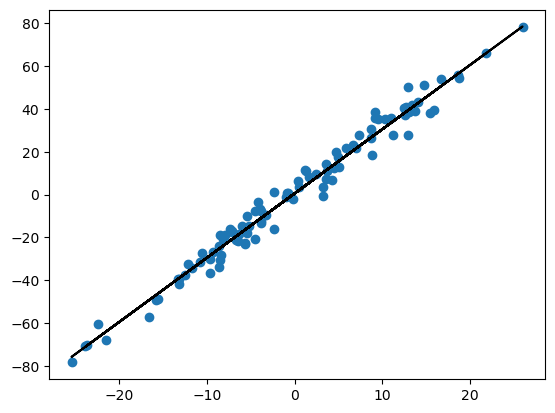

In [57]:
x = torch.randn(100, 1) * 10
y_clear = 3*x + 0.5
y = y_clear + 5 * torch.randn(100, 1)

plt.plot(x.cpu().numpy(),y.cpu().numpy(),'o')
plt.plot(x.cpu().numpy(),y_clear.cpu().numpy(),'-k')

Теперь попробуем применить линейнную регрессию для нашей модели. 

In [58]:
def model(x,w,b):
    return x * w + b

Проинициализируем параметры модели некоторыми случайными переменными

In [59]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

Зададим функцию потерь

$ MSE = \sum (y-x)^2 / N$

In [60]:
def mse(predicts, targets):
    diff = predicts - targets
    return torch.sum(torch.square(diff)) / diff.numel()

Посмотрим на начальные значения предсказаний и сравним их с ожидаемыми значениями путем подчета функции потерь (MSE)

In [61]:
predicts = model(x,w,b)
# print(predicts)

loss = mse(predicts, y)
print('loss = ',loss.data.cpu().numpy())

loss =  1988.7495


Пока значение функции потерь большое, модель будет давать большую ошибку предсказания.

Для снижения функции потерь будем использовать метод градиентного спуска.

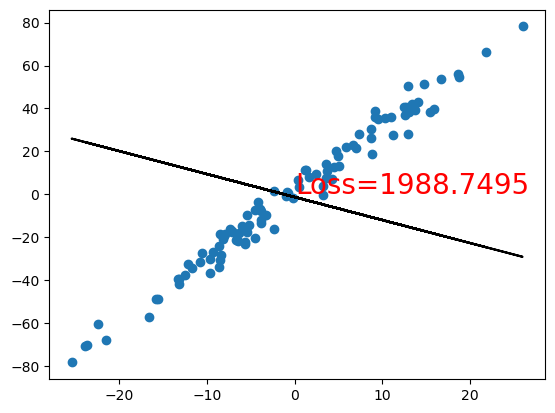

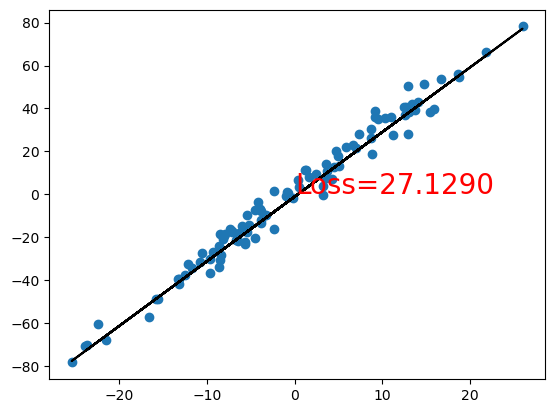

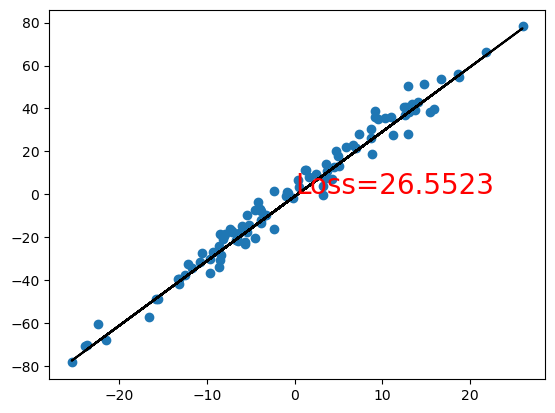

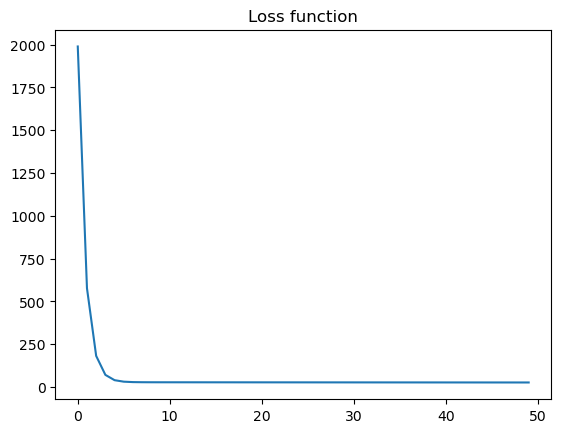

In [62]:
epochs = 50
LR = 0.002 

trainig = np.zeros(epochs)
for i in range(epochs):
    predicts = model(x,w,b)
    loss = mse(predicts, y)
    trainig[i] = loss.data.cpu().numpy()
    loss.backward()
    with torch.no_grad():
        w -= w.grad * LR
        b -= b.grad * LR
        w.grad.zero_()
        b.grad.zero_()

    if(i%20 == 0):
        plt.plot(x.data.cpu().numpy(),y.data.cpu().numpy(),'o')
        plt.plot(x.data.cpu().numpy(),predicts.data.cpu().numpy(),'-k')
        plt.text(0.1, 0.1, 'Loss=%.4f' %(trainig[i]), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        
plt.plot(trainig,)
plt.title('Loss function')
plt.show()

посмотрим на найденные значения наклона и смещения

In [63]:
print(w)
print(b)

tensor([3.0121], requires_grad=True)
tensor([-0.9525], requires_grad=True)


# Модель в `PyTorch`

Попробуем реализовать регрессию в более популярном и принятом в `PyTorch` виде.
Основной способ, предлагаемый в `PyTorch` для создания моделей, — это их наследование от базового класса `torch.nn.Module`. Однако, для упрощения, в некоторых случаях можно использовать контейнер `torch.nn.Sequential()` — конструкция которого знакома многим по опыту работы с `tf.keras`.

В созданном классе переопределим функцию инициализации — конструктор класса `__init__` и функцию, реализующую прямое распространение ошибки `forward`. 

Для построения линейной регрессии используем класс `nn.Linear` — фактически данный класс реализует выражение `y=Wx+b`.


In [64]:
from torch import nn

In [65]:
model = nn.Sequential(nn.Linear(in_features=1, out_features=1))

Если работа в `PyTorch` производится с использованием `GPU`, то модель необходимо отправить на устройство. Для этого вы воспользуемся методом `to()` c указанием устройства.

Отметим также, что в случае, если обучение производится с использованием нескольких `GPU`, то модель рекомендуется загрузить с использованием контейнера `nn.DataParallel`. Например так:
```model = nn.DataParallel(model, device_ids=devices).to(devices[0])```. Подробней про параллелизм данных в `PyTorch` можно прочитать, например, [тут](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html).

In [66]:
model = model.to(device)

Отметим, что в случае с `nn.Model` регрессия могла бы быть записана следующим образом.
```python
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        return self.l1(x)
```
При этом инициализация модели могла бы быть записана следующим образом.
```python
model =  LinearRegression()   
```

Также заметим, что линейный слой мог бы быть вызванным из `PyTorch` в процедурном стиле с указанием весовых параметров как:
```python
    x = F.linear(x, weight=w.view(1,-1), bias=b)
```

>Важно отметить что в последних версиях `PyTorch` помимо слоя `nn.Linear` появился слой [`nn.LazyLinear`](https://pytorch.org/docs/stable/generated/torch.nn.LazyLinear.html). Отличием этой реализации является отсутствие необходимости указания числа входных параметров. Это число будет определено при первом вызове модели. С использованием слоя `nn.LazyLinear` модель бы выглядела как:
```python
   model = nn.Sequential(nn.LazyLinear(out_features=1)) 
```

Отметим, что в настоящее время в общем случае рекомендуется использовать контейнер типа `nn.Sequential` для простых последовательностей. В том числе, часто результат `nn.Sequential` является частью более сложной модели, описанной в `nn.Model`.

Посмотрим на набор параметров созданной модели, по этим параметрам будет вычисляться градиент. Сейчас параметры проинициализированы некоторыми случайными значениями.

In [67]:
w,b = model.parameters()
print(w,b)

Parameter containing:
tensor([[-0.6763]], requires_grad=True) Parameter containing:
tensor([0.5819], requires_grad=True)


Теперь выберем стандартную функцию потерь и оптимизатор (метод градиентного спуска). 

Отметим, что при использовании `GPU` функция потерь также должна быть загружена на вычислительное устройство — это тоже часть вычислительного графа.

In [68]:
LR = 0.005
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
criterion = criterion.to(device)


Проведем обучение сети. В данном случае нам не понадобится вручную обновлять значения весов и делать некоторые другие операции из проведенных выше. Все эти операции за нас сделает экземпляр класса `optimizer`.

Epoch:  1  Loss:  1630.030029296875
Epoch:  21  Loss:  23.265575408935547
Epoch:  41  Loss:  23.25350570678711
Epoch:  61  Loss:  23.245424270629883
Epoch:  81  Loss:  23.240015029907227


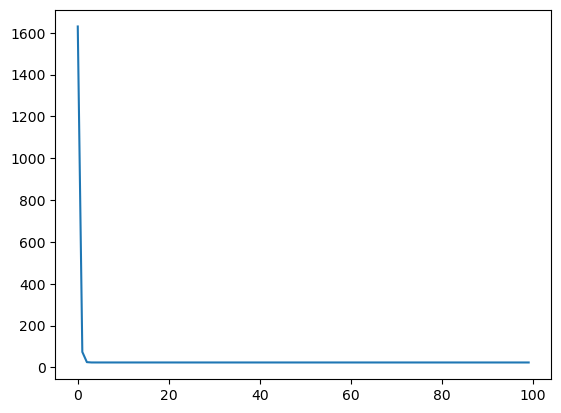

In [69]:
epochs = 100
losses = np.zeros(epochs)

for i in range(epochs):
    predict = model.forward(x)
    
    loss = criterion(predict, y)

    losses[i] = loss.data.cpu().numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//20 == i/20):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

Посмотрим на то, какие теперь получились значения наших параметров.

In [70]:
[w, b] = model.parameters()
print(w,b)


Parameter containing:
tensor([[3.0189]], requires_grad=True) Parameter containing:
tensor([0.7150], requires_grad=True)


Визуализируем результат предсказания.

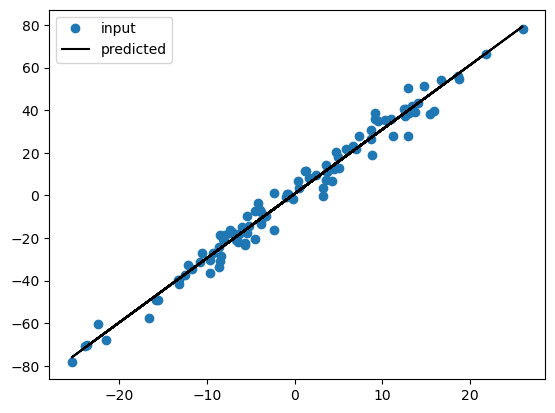

In [71]:
predict = model.forward(x)
plt.plot(x.data.cpu().numpy(),
         y.data.cpu().numpy(),'o', 
         label='input')
plt.plot(x.data.cpu().numpy(),
         predict.data.cpu().numpy(),'-k', 
         label='predicted')
plt.legend()
plt.show()

Посмотрим на то, какие данные из модели можно получать.

Для этого есть несколько способов

In [72]:
print('Parameters\n',list(model.parameters()), end='\n\n')
print('Parameters Names\n',list(model.state_dict()), end='\n\n')
# print(list(model.named_buffers()))
print('Named Parameters\n', list(model.named_parameters()), end='\n\n')

Parameters
 [Parameter containing:
tensor([[3.0189]], requires_grad=True), Parameter containing:
tensor([0.7150], requires_grad=True)]

Parameters Names
 ['0.weight', '0.bias']

Named Parameters
 [('0.weight', Parameter containing:
tensor([[3.0189]], requires_grad=True)), ('0.bias', Parameter containing:
tensor([0.7150], requires_grad=True))]



In [73]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters for the model: %d' % (num_params))

num_params = sum(p.numel() for p in model.parameters() )
print('Number of all parameters for the model: %d' % (num_params))

Number of trainable parameters for the model: 2
Number of all parameters for the model: 2


Также для оценки модели есть специальная функция ```summary``` из библиотеки [```torchinfo```](https://github.com/tyleryep/torchinfo).

In [74]:
try:
    import torchinfo
except:
    !pip install torchinfo
finally:
    from torchinfo import summary

summary(model,input_size = x.shape[1:])

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

Теперь попробуем сохранить модель.

In [75]:
torch.save(model.state_dict(), 'test_module.pt')

Удалим модель.

In [76]:
del(model)

Теперь заново загруим модель, но назовем ее ```new_model```.

In [77]:
new_state_dict = torch.load('test_module.pt')
new_model = nn.Sequential(nn.Linear(in_features=1, out_features=1))
new_model.load_state_dict(new_state_dict)

<All keys matched successfully>

*Отметим*, что для модели в классовом стиле тут не пришлось бы переписывать модель, а необходимо бы было лишь создать новый экземпляр класса,
```python
new_model = LinearRegression()
```

проверим, что новая модель соответствует обученной прежде

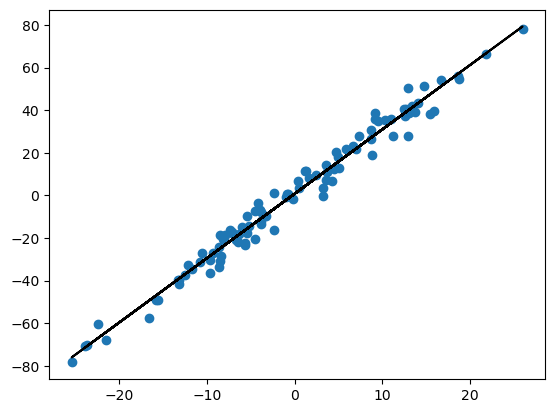

In [78]:
predict = new_model.forward(x)
plt.plot(x.data.cpu().numpy(),
         y.data.cpu().numpy(),'o')
plt.plot(x.data.cpu().numpy(),
         predict.data.cpu().numpy(),'-k')

Также модель можно сохранить с использованием JIT скрипотов, что полезно для ее последующего портирования, например на С++

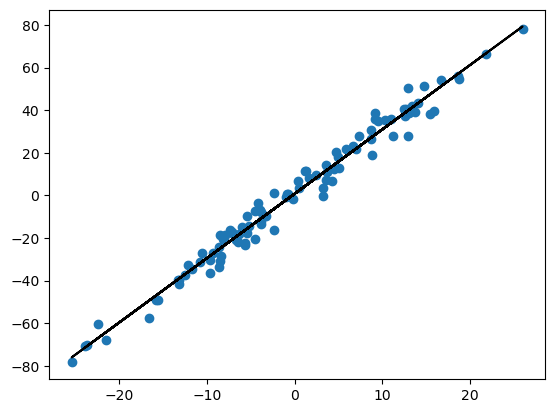

In [79]:
scripted_module = torch.jit.script(new_model)
torch.jit.save(scripted_module, 'mymodule.pt')
again_new_model = torch.jit.load('mymodule.pt')

predict = again_new_model.forward(x)
plt.plot(x.data.cpu().numpy(),
         y.data.cpu().numpy(),'o')
plt.plot(x.data.cpu().numpy(),
         predict.data.cpu().numpy(),'-k')

Отметим также возможность задания функции `backward` [самостоятельно](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-defining-new-autograd-functions)

Для закрепления результата давайте посмотрим на реализацию многоклассовой (softmax) регрессии в `PyTorch`.

Создадим набор данных из трех классов.


In [80]:
from sklearn import datasets
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
import numpy as np

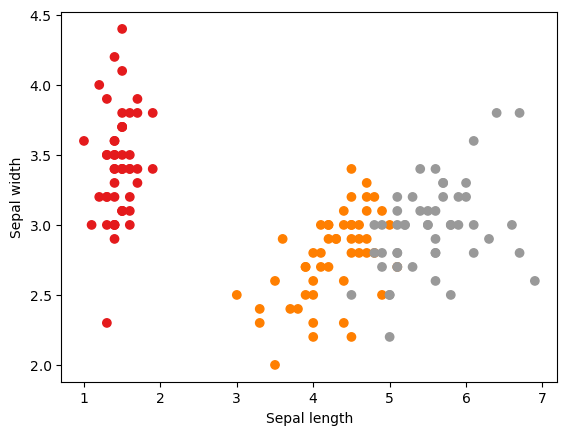

(150, 2)
(150,)
torch.Size([105, 2]) torch.Size([45, 2]) torch.Size([105, 1]) torch.Size([45, 1])


In [81]:
iris = datasets.load_iris()

x = iris.data[:,[2,1] ]
y = (iris.target) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

# standardize
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

print(x.shape)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test  = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Запишем модель регрессии в стиле `nn.Sequential`

In [82]:
model = nn.Sequential(nn.Linear(in_features=x_train.shape[1], out_features=3),
                     nn.LogSoftmax(dim=1))
summary(model,input_size = x.shape[:])

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [150, 3]                  --
├─Linear: 1-1                            [150, 3]                  9
├─LogSoftmax: 1-2                        [150, 3]                  --
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

<blockquote>
<em>Модель в  стиле класса имела бы следующий вид.</em>

  ```python
  class SoftmaxRegression(nn.Module):    
      
      def __init__(self, 
                  in_features = 2, 
                  n_classes   = 3):
          
          super().__init__()
          
          self.l1 = nn.Linear(in_features=in_features, out_features=n_classes)
          
      def forward(self, x):
          return torch.nn.functional.log_softmax(self.l1(x), dim=1)
  ```
<blockquote>
  а инициализация модели могла бы быть записана как
  
  ```python
  model = SoftmaxRegression(x_train.shape[1],3)
  summary(model,input_size = x.shape[1:])
  ```

  *Ометим*, что в будущих практиках мы перейдем к стилю классов,  так как тот является более гибким и более распростронен для `PyTorch`.

Теперь перейдем к обучению модели.

В качестве функции потерь выберем `nn.NLLLoss()` (`negative log likelihood loss`) — по сути, кросс-энтропию. Эта функция потерь ждет на входе т. н. логит (`logit` — `log probabilities`). Поэтому тут используется функция активации `log_softmax` вместо `softmax`. 

Отметим, что данный тип функции потерь относится к *sparse categorical cross entropy*, то есть не требует *one hot* кодирования. 

Важно отметить, что самая распространенная ошибка новичков — несоответствие между функцией потерь и выходной функцией активации. Например, в `PyTorch` есть функция потерь `nn.CrossEntropyLoss`. Эта функция потерь в `PyTorch` выполняет две операции: `nn.LogSoftmax` и `nn.NLLLoss`. Следовательно, входом для этого модуля потерь должен быть выход последнего линейного слоя. Не применяйте `softmax` перед функцией `nn.CrossEntropyLoss`. В противном случае `PyTorch` применит `log-softmax` к выводам `softmax`, что значительно ухудшит производительность и доставит вам головную боль.

Также отметим, что указанный функционал можно использовать в функциональном стиле:
* `nn.CrossEntropyLoss` $\to$ `torch.nn.functional.cross_entropy`
* `nn.NLLLoss` $\to$ `torch.nn.functional.nll_loss`
* `nn.LogSoftmax` $\to$ `torch.log_softmax`

В качестве оптимизатора зададим `torch.optim.SGD`.

In [103]:
LR = 0.4

criterion = nn.NLLLoss()#nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

Epoch:  1  Loss:  1.1239889860153198
Epoch:  201  Loss:  0.21253667771816254
Epoch:  401  Loss:  0.16243252158164978
Epoch:  601  Loss:  0.1404130607843399
Epoch:  801  Loss:  0.12800836563110352


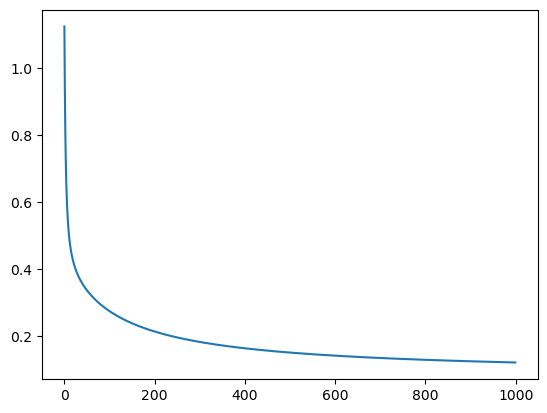

In [104]:
epochs = 1000
losses = np.zeros(epochs)

for i in range(epochs):

    predict = model.forward(x_train.to(device))

    loss = criterion(predict, torch.squeeze(y_train).type(torch.LongTensor).to(device))

    losses[i] = loss.data.cpu().numpy()
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if(i//(epochs//5) == i/(epochs//5)):
        print("Epoch: ", i+1, " Loss: ", loss.item())

plt.plot(losses)

В результате функция предсказания выдает 3 класса в виде массива. 

Мы можем построить данные классы отдельно для того, чтобы посмотреть на ошибки.

torch.Size([150, 3])


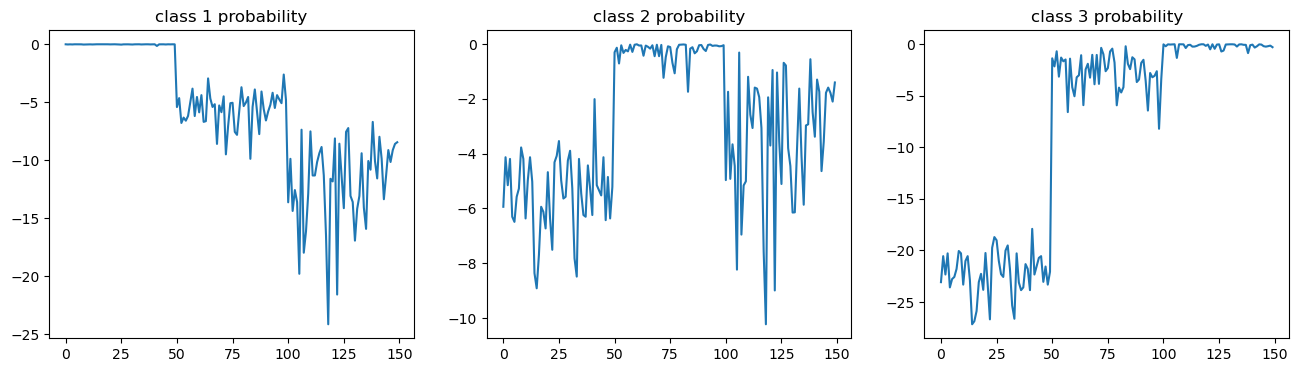

In [105]:
predict = model.forward(torch.from_numpy(x).type(torch.float).to(device))
print(predict.shape)
Z = predict.detach().cpu().numpy()
plt.figure(figsize = (16,4))
plt.subplot(1,3,1);plt.plot(Z[:,0]);plt.title('class 1 probability')
plt.subplot(1,3,2);plt.plot(Z[:,1]);plt.title('class 2 probability')
plt.subplot(1,3,3);plt.plot(Z[:,2]);plt.title('class 3 probability')
plt.show()

Также полезным будет визуализация нашего классификатора

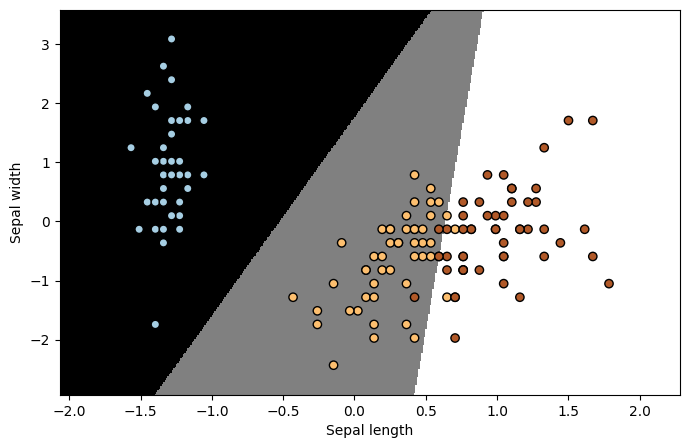

In [84]:
import matplotlib.pyplot as plt


x1_min, x1_max = x[:, 0].min() - .5, x[:, 0].max() + .5
x2_min, x2_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .01
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
 
    
    
predict = model.forward(torch.from_numpy(np.c_[xx1.ravel(), xx2.ravel()]).type(torch.float).to(device))
Z = predict.detach().cpu().numpy().argmax(axis=1).reshape(xx1.shape)

plt.figure(figsize=(8, 5))

plt.pcolormesh(xx1, xx2, Z,shading='auto', cmap=plt.cm.gray)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())


plt.show()

Посмотрим на то, чем отличается предсказанный класс и вероятность его предсказания. 

In [124]:
idxs = np.random.randint(0,len(x),5)
x_t = torch.from_numpy(x[idxs]).type(torch.float).to(device)
y_t = torch.from_numpy(y[idxs]).type(torch.long).to(device)
x_t.shape, y_t.shape

(torch.Size([5, 2]), torch.Size([5]))

In [125]:
def x_to_probs(model, x):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = model(x)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    probs = [torch.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]
    return preds, probs

In [126]:
preds, probs = x_to_probs(model, x_t)

import pandas as pd
pd.DataFrame({'class':y_t.numpy(),'predict':preds, 'probablity score':probs})


,class,predict,probablity score
0,2,2,0.999043
1,1,1,0.722893
2,1,1,0.652269
3,2,2,0.997863
4,1,1,0.739737


## Задания.

__1.__ Перепишите модель логистической регрессии  с использованием шаблона `Sequential`. Данный подход является альтернативным к подходу наследования класса.
   
<details>
<summary>Click here for hint</summary>
```python

       model = nn.Sequential(
        nn.Linear(in_features=x_train.shape[1], out_features=1), 
        )      
```
    



**2.** Одним из первых решений перехода от простого персептрона (можно с поправками читать «логистическая регрессия») к архитектуре модулирующую нейронную сеть была попытка добавить линейный слой, имеющий некоторые случайные веса и не имеющий смещения. Попробуйте расширить модель `SoftMaxRegression` путем добавления такого слоя. Этот слой не должен обучаться.

Имена параметров можно узнать как:
```python
    for param in model.named_parameters():
        print(param)
```
Совйства конкретного параметра можно изменить, обращаясь к нему по имени, например при помощи 
```python 
model.get_parameter( *param name*)
```

   
<details>
<summary>Click here for hint</summary>
```python
    
    model = nn.Sequential(nn.Linear(in_features=x_train.shape[1], out_features=x_train.shape[1], bias = False),
                      nn.Linear(in_features=x_train.shape[1], out_features=3),
                      nn.Softmax(dim=1))
    
    model.get_parameter('0.weight').requires_grad=False  
    
```    

__3.__ Перепешите модель `softmax regression` с использованием `nn.CrossEntropyLoss` и  `nn.LazyLinear`


__4.__ Иногда не хватает стандартных слоев `PyTorch`. Тогда полезным может оказаться использование самодельных слоев. Например  ниже приведен пример слоя, нормализующего батч, поданный в него. 
```python
class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return (X - X.mean())/X.std()
```
Объявление слоя будет стандартным, например, `layer = CenteredLayer()`
Предлагаем создать регрессию (любую из рассмотренных) с использованием этого нового слоя.


__5.__ Трансформируйте набор данных «Ирисы» в два класса и постройте логистическую регрессию в `PyTorch`.
> Отметим, что функции потерь при классификации, такие как бинарная перекрестная энтропия (`Binary Cross Entropy`, `BCE`), имеют две версии в `PyTorch`: с логитами и без них (`BCELoss` и `BCEWithLogitsLoss`). Рекомендуется использовать функции потерь с логитами. Это связано с тем, что они численно более стабильны и предотвращают любые нестабильности, когда модель сильно ошибается в предсказании. Если не использовать функции потерь для логитов, можно столкнуться с проблемами, когда модель предсказывает очень высокие или низкие значения, которые не соответствуют действительности. В `BCELoss` можно столкнуться с логарифмом, имеющим значение, очень близкое к 0. Если вам повезет, вы просто получите очень высокое число (и ваша модель может расходиться из-за этого), или вообще получите значение `NaN`./
> Кроме того, `nn.BCELoss()` требует использования функции активации `nn.Sigmoid()`.

# Знакомство с полносвязным слоем

Напомним, что нейронные сети  представляют собой вычислительные системы, состоящие из последовательности взаимосвязанных слоев. Пропуская данные через эти слои, нейронная сеть способна научиться приближенно выполнять вычисления, необходимые для преобразования входных данных в выходные. 

<!-- В `PyTorch` нейронные сети можно создавать с помощью пакета `torch.nn`. -->

<!-- При построении нейронных сетей мы часто думаем о распределении вычислений по слоям, некоторые из которых имеют обучаемые параметры, которые будут оптимизированы в процессе обучения. -->

<!-- В TensorFlow такие пакеты, как Keras, TensorFlow-Slim и TFLearn, предоставляют высокоуровневые абстракции над необработанными вычислительными графами, которые полезны для построения нейронных сетей. -->

В `PyTorch` типичные слои и вспомогательные элементы описаны в пакете `torch.nn`. Строго говоря пакет `torch.nn` определяет набор модулей, которые примерно эквивалентны слоям нейронной сети. Модуль получает входные тензоры и вычисляет выходные тензоры, а также может содержать внутреннее состояние, например тензоры, содержащие обучаемые параметры. Пакет `torch.nn` также определяет набор полезных функций потерь, которые обычно используются при обучении нейронных сетей.
 

Для начала вспомним, что в `PyTorch` полносвязный слой задаётся как `nn.Linear`. По существу, этот слой выполняет операцию $x_iW^T$, то есть производит умножение входного вектора $x_i=[x_{0i}, x_{1i}, ..., x_{N-1,i}]$ размером $N$ на матрицу весовых коэффициентов размером $(M\times N)$ вида
$$ \begin{bmatrix}
w_{00} & ... & w_{0,N-1}\\
&...&\\
w_{M-1,0} & ... & w_{M-1,N-1}
\end{bmatrix}$$
Таким образом, результат $x_iW^T$ будет иметь размерность $M$. Эта размерность может быть как больше, чем $N$, так и меньше. Например, она может соответствовать набору классов.

Если на вход слоя подать матрицу, например размером $(p\times N)$, то на выходе, соответственно, будет тоже матрица размером $(p\times M)$.

In [85]:
import torch
import torch.nn as nn
p=2
N=4
M=3

x   = torch.randn(p, N)
W   = torch.randn(M,N)

out = torch.mm(x,W.t())
print(f'outpit size is {out.shape}')

outpit size is torch.Size([2, 3])


Теперь выполним ту же операцию при помощи полносвязного слоя `nn.Linear`

In [86]:
fc_layer=nn.Linear(in_features=N,out_features=M,bias=False)
out = fc_layer(x)
print(f'outpit size is {out.shape}')

outpit size is torch.Size([2, 3])


Параметры слоя могут быть принудительно заданы, то есть проинициализированы. Для этого задаваемый тензор следует привести к типу параметров при помощи объекта класса `nn.Parameter`.
> Ранее в `PyTorch` и других подобных фреймворках была концепция переменной `Variable`. Однако в последних релизах `PyTorch` появились только тензоры, а концепция переменных была упразднена. Вместо переменной теперь имеет место концепция параметра (`Parameter`). 
Параметры — это просто тензоры, ограниченные модулем (объектом класса), в котором они определены (в методе `__init__` конструктора модуля).
Все заданные параметры будут появляться внутри module.parameters(). Это удобно, когда вы создаете свои собственные модули, которые учатся благодаря этим параметрам градиентному спуску. <br>
Все, что справедливо для тензоров `PyTorch`, справедливо и для параметров, поскольку они являются тензорами.
Кроме того, если модель переходит на `GPU`, параметры тоже переходят. При сохранении модели параметры также будут сохранены. <br>
Существует схожая с параметрами модели концепция, называемая буферами. Буфер — это именованные тензоры внутри модуля, но эти тензоры не предназначены для обучения с помощью градиентного спуска. Буферы только хранят значения или обновляются внутри модуля `forward()` самостоятельно. Буферы также являются частью модели. 


In [87]:
fc_layer.weight = nn.Parameter(W)

In [88]:
fc_layer(x) == torch.mm(x,W.t())

tensor([[True, True, True],
        [True, True, True]])

Значения параметров можно получить обращаясь к данным в них

In [89]:
fc_layer.weight.data

tensor([[-1.2981, -1.0916,  0.3532, -0.2158],
        [-0.4281, -0.9076,  0.9063,  0.6494],
        [-1.4606,  0.3239,  0.5501,  0.4824]])

Слой и его параметры также могут быть проинициализированы. Например, можно проинициализировать слои нормальным распределением, так как показано ниже. 

In [ ]:
nn.init.normal_(fc_layer.weight, std = 1.0/(N*M),)
fc_layer.weight.data

Попробуем построить наиболее простую полносвязную нейронную сеть. Сеть будет состоять из нескольких полносвязных слоев.
Для внутренних слоев мы используем функции активации `relu`.  
> Линейный слой в нейронной сети может быть дополнен как регуляризацией, так и нелинейностью — функцией активации. Считается, что чем больше нелинейностей, тем более сложные зависимости в данных способна улавливать модель.




In [90]:
with torch.no_grad():
    out = fc_layer(x)
    print(out)
    print(torch.relu(out))

tensor([[ 1.4182,  0.3642,  0.1089],
        [ 0.5125, -0.5776,  0.3179]])
tensor([[1.4182, 0.3642, 0.1089],
        [0.5125, 0.0000, 0.3179]])


виднно, что значения меньше нуля занулились!

Попробуем также завести регуляризацию методом дропаут. Для этого нужно будет создать соответствующий слой. 
Дроп аут будем использовать в режиме тренировки (когда часть результатов «выключают»). 
> В `Pytorch` в режиме обучения часть после дропаут ре-нормируют на значение вероятности. 
> Напомним, что в режиме работы модели (`inference`) дропаут не работает.

In [91]:
dropout = nn.Dropout1d(p=0.5)

with torch.no_grad():
    out = fc_layer(x)
    print(out)
    print(dropout(out))

tensor([[ 1.4182,  0.3642,  0.1089],
        [ 0.5125, -0.5776,  0.3179]])
tensor([[ 2.8364,  0.7285,  0.2177],
        [ 1.0251, -1.1552,  0.6358]])


Также протестируем функции батч-нормализации

In [92]:
norm = nn.BatchNorm1d(M)

with torch.no_grad():
    out = fc_layer(x)
    print(out)
    print(norm(out))

tensor([[ 1.4182,  0.3642,  0.1089],
        [ 0.5125, -0.5776,  0.3179]])
tensor([[ 1.0000,  1.0000, -0.9995],
        [-1.0000, -1.0000,  0.9995]])


## Задание

**1.** Расширить понятие «линейная регрессия» из прошлого занятия с использованием полносвязного слоя и вспомогательных слоев.


**2.** В настоящее время очень перспективными считаются нейронные сети типа трансформеры. Типичный полносвязный блок таких сетей состоит из слоев типа:
`Dropout`, `LayerNorm`, `GELU`, `Linear`. Опишите архитектуры с входным линейным слоем (назовем его `Linear Projection`) и полносвязным блоком, включающим указанные слои в правильном порядке. Вероятность дроп-аута следует выставить $10\%$.

>Отметим, что в ряде случаев перед использованием функций типа `BatchNorm` слои используются без смещения (например, `nn.Conv2d(..., bias=False, ....)`). Это связано с тем, что на первом шаге `BatchNorm` вычитает среднее, что эффективно нивелирует эффект смещения.

**3.** Построить систему обучения линейной регрессии с заданной функцией потерь, например, `MAE`, `RidgeRegression`, или другими функциями потерь из [стандартного набора](https://pytorch.org/docs/stable/nn.html#loss-functions).